In [49]:
%matplotlib inline
import obspy
import glob
import os, sys
import librosa
import numpy as np
import scipy as sp
import scipy.signal as signal
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler

random_state = 6
np.random.seed(random_state)

In [241]:
# total length of a seismogram is 1260 seconds or 21 minutes
def read_seismogram(filename):
    st = obspy.read(filename)
    st.plot()
    sys.exit()
    return st

def read_seismogram_filtered(filename):
    st = obspy.read(filename)
    st.filter('bandpass', freqmin=0.05, freqmax = 5.0)
    return st

def extract_features(seismogram, signal_label):
    data = seismogram[0].data
    sample_rate = seismogram[0].stats.sampling_rate
    stft = np.abs(librosa.stft(data))
    mfccs = librosa.feature.mfcc(y = data, sr=sample_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs.T, axis = 0)
    mfccs_delta = np.mean(librosa.feature.delta(mfccs).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S = stft, sr = sample_rate).T, axis = 0)
    mel = np.mean(librosa.feature.melspectrogram(data, sr = sample_rate).T, axis= 0)
    
    S, phase = librosa.magphase(stft)
    cents = librosa.feature.spectral_centroid(S=S)
    cents_db = np.mean(librosa.amplitude_to_db(S, ref=np.max).T, axis = 0)
    
    
    moment = sp.stats.moment(data)
    variation = sp.stats.variation(data)
    skew = sp.stats.skew(data)
    var = np.var(data)
    autocr = np.correlate(data, data)
    kurto = sp.stats.kurtosis(data)
    return np.hstack([mfccs_mean, mfccs_delta, chroma, mel, cents_db, moment,variation, skew, var, autocr, kurto, signal_label])

def parse_and_stack_seismograms(parent_dir, sub_dirs):
    
    features = np.empty((0,1252))
    if parent_dir == 'seismograms/explosions/':
        signal_label = 1
    elif parent_dir == 'seismograms/earthquakes/':
        signal_label = 0
        
    for indx, sub_dir in enumerate(sub_dirs):
        for filename in glob.glob(os.path.join(parent_dir, sub_dir, '*.SAC')):
            seismogram = read_seismogram(filename)
            single_feature= extract_features(seismogram, signal_label)
            features = np.vstack([features, single_feature])
        
    dataFrame = pd.DataFrame(features)
    return dataFrame

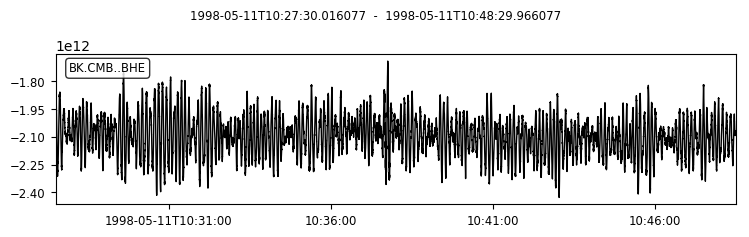

SystemExit: 

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [242]:
parent_dir = 'seismograms/explosions/'
sub_dirs = ['1998-05-11-mb52-india','1998-05-28-mb48-pakistan', '1998-05-30-mb46-pakistan', '2013-02-12-mb51-north-korea', '2016-01-06-mb51-north-korea', '2017-09-03-mb63-north-korea']
df_explosions  = parse_and_stack_seismograms(parent_dir,sub_dirs)

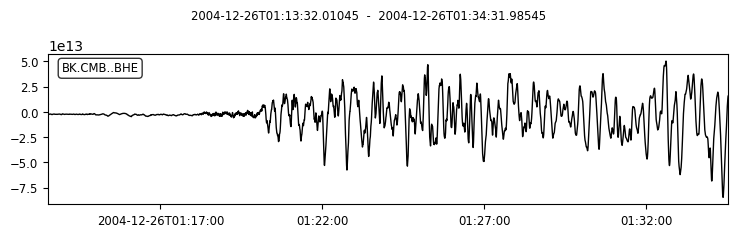

SystemExit: 

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [243]:
parent_dir = 'seismograms/earthquakes/'
sub_dirs = ['2004-12-26-mw90-sumatra', '2010-03-12-mw55-myanmar-india-border-region', '2017-08-15-mb49-southeast-of-ryukyu-islands', '2017-09-08-mww81-near-coast-of-chiapas-mexico']
df_earthquakes  = parse_and_stack_seismograms(parent_dir,sub_dirs)

In [212]:
frames = [df_explosions, df_earthquakes]
df = pd.concat(frames)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1606.000000,1606.000000,1606.0,1606.000000,1606.000000,1.606000e+03,1.606000e+03,1606.000000,1606.000000
mean,941.665095,75.003741,9.231527,50.089629,9.011473,33.163889,11.137501,21.313839,13.738046,14.940774,...,-79.980776,-79.979309,-79.978603,0.0,278.243072,-0.188070,3.743952e+12,5.021586e+17,31.972242,0.323163
std,225.061154,37.099307,35.261332,19.673425,23.210687,12.591131,14.331587,7.673028,8.545568,5.140691,...,0.190952,0.217414,0.185078,0.0,7662.201633,4.893058,2.781032e+13,4.202786e+18,763.247083,0.467830
min,487.638894,0.590916,-95.650386,9.991572,-63.162621,5.273298,-38.585637,0.495500,-20.883890,-4.159762,...,-80.000008,-80.000008,-80.000008,0.0,-18424.601562,-148.536407,1.145826e+00,1.647420e+08,-1.557898,0.000000
25%,775.150225,46.703585,-14.839313,36.362204,-7.899532,24.523875,2.047651,16.663696,9.773171,12.017408,...,-80.000000,-80.000000,-80.000000,0.0,-0.564912,-0.066578,1.089125e+05,4.726152e+10,-0.056514,0.000000
50%,900.926968,74.069958,12.228716,49.900223,12.684427,31.645115,14.229327,20.592639,15.489321,15.137249,...,-80.000000,-80.000000,-80.000000,0.0,0.114271,-0.004160,1.769261e+06,7.682032e+11,0.241702,0.000000
75%,1095.790912,100.281783,35.329806,63.719153,28.028384,40.849423,22.416433,25.514643,19.247300,18.234024,...,-80.000000,-80.000000,-80.000000,0.0,2.218386,0.057529,6.593582e+08,8.217131e+14,1.950677,1.000000
max,1572.073401,202.898203,98.485401,123.096246,64.457973,81.809122,47.306912,52.774850,39.409499,35.151009,...,-73.452782,-72.382477,-74.135483,0.0,300014.312500,11.173301,3.098055e+14,6.909585e+19,27426.243439,1.000000


In [213]:
df.to_csv('seismogram_data_cents_db_mfcc_delta.csv')